
# Titanic DataSet

In [67]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# Dataset
data = pd.read_csv('train.csv')

In [69]:
data.shape

(891, 12)

In [70]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Text(0.5, 1.0, 'Missing values heatmap')

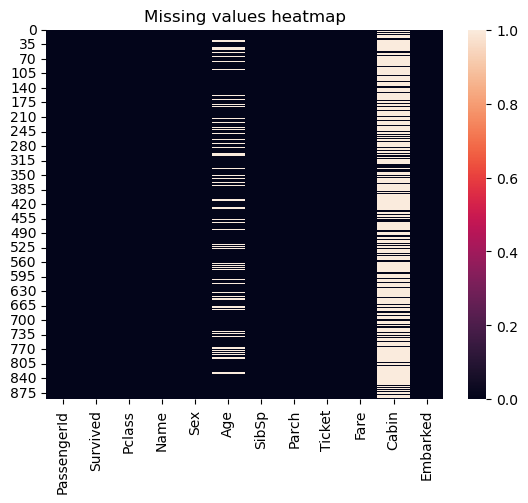

In [72]:
data.isnull().sum()
sns.heatmap(data.isnull(), cbar = True).set_title("Missing values heatmap")

### Column types
- Numerical - Age,Fare,passengerid
- categorical - Survived,Pclass,Sex,SibSp,Parch,Embarked
- Mixed - Name,Ticket,Cabin

----

# *Univariate analysis*

## AGE column

In [73]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

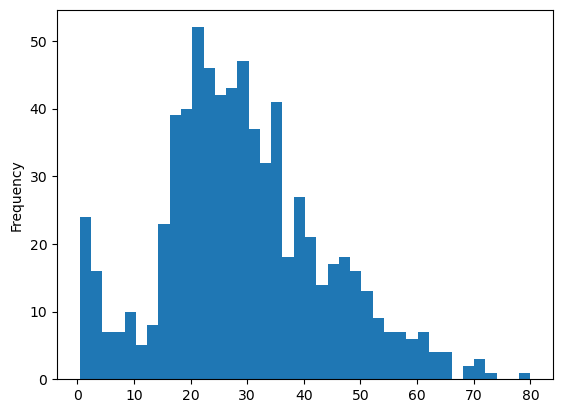

In [74]:
data['Age'].plot(kind='hist',bins=40)

Text(0.5, 1.0, 'AGE COLUMN skewness')

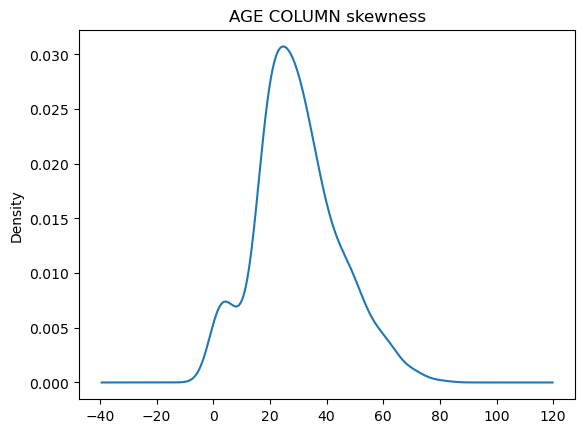

In [75]:
data['Age'].plot(kind='kde')
plt.title('AGE COLUMN skewness')

In [76]:
data['Age'].skew()

0.38910778230082704

<Axes: >

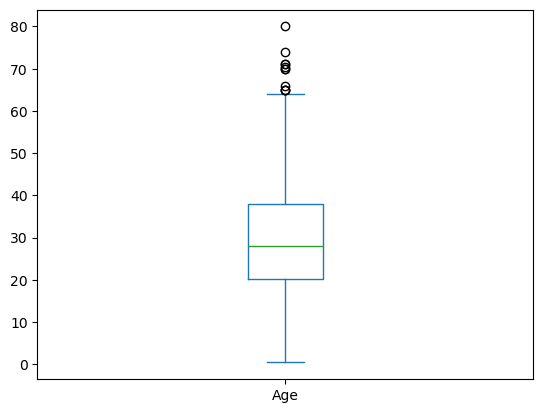

In [77]:
data['Age'].plot(kind= 'box')

In [78]:
data['Age'].isnull().sum()

177

In [79]:
data['Age'].isnull().sum()/len(data['Age'])*100

19.865319865319865

### Conclusion age column
- there some outliers in AGE column (but ouliers are valid data)
-  ariound 20% values are missing
- Age are normally(almost) distributed

----

## FARE column

In [80]:
data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

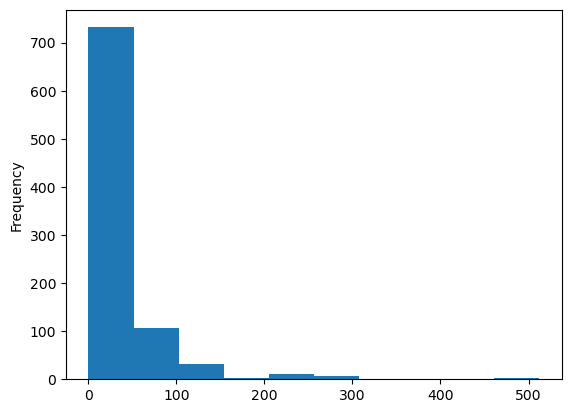

In [81]:
data['Fare'].plot(kind='hist')

<Axes: ylabel='Density'>

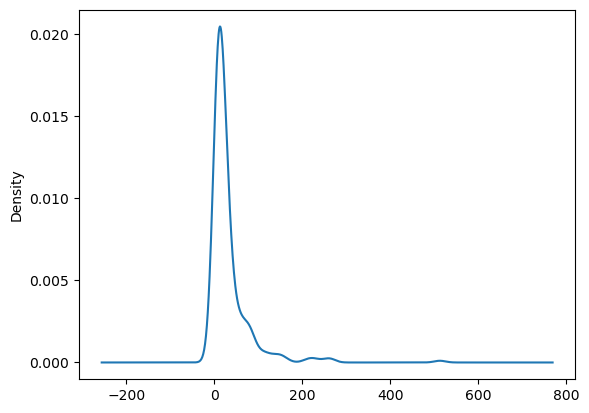

In [82]:
data['Fare'].plot(kind='kde')

In [83]:
data['Fare'].skew()

4.787316519674893

<Axes: >

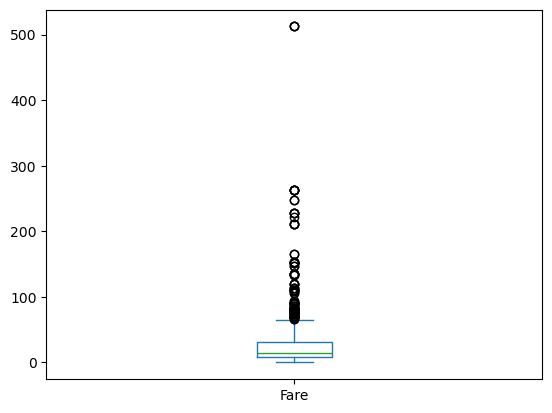

In [84]:
data['Fare'].plot(kind='box')

In [85]:
data[data['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [86]:
data['Fare'].isnull().sum()

0

### Conclusion fare column
- the data is highly positively skewed
- fare column actually contains the group fare not the individual fare( this might be issue)
- we need to create a new column called individual fare

----

# Now start with categorical columns

## Survived column

In [87]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [88]:
data['Survived'].isnull().sum()

0

<Axes: xlabel='Survived'>

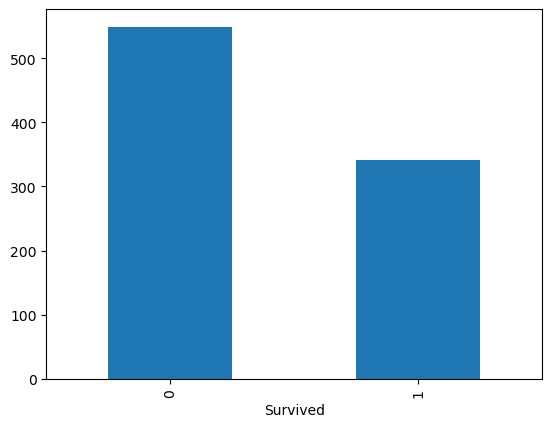

In [89]:
data['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

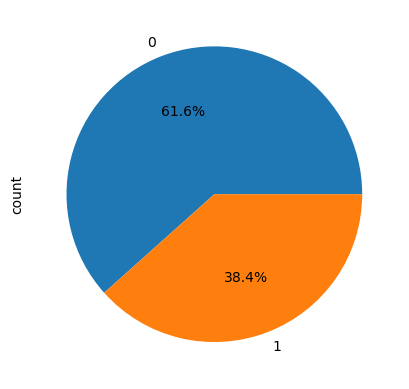

In [90]:
data['Survived'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Conclusion Survived column
- Around 62% of people are dead in this disaster.


----

## Pclass column

In [91]:
data['Pclass'].isnull().sum()

0

<Axes: xlabel='Pclass'>

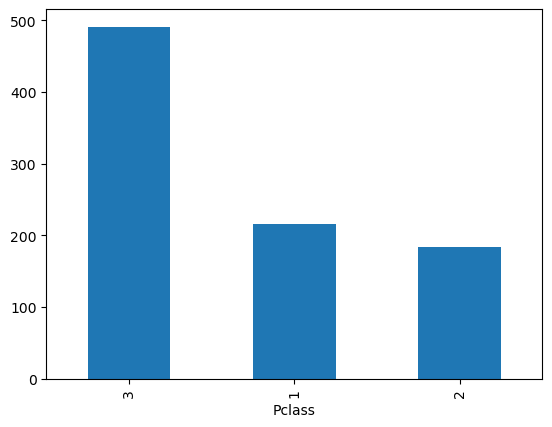

In [92]:
data['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

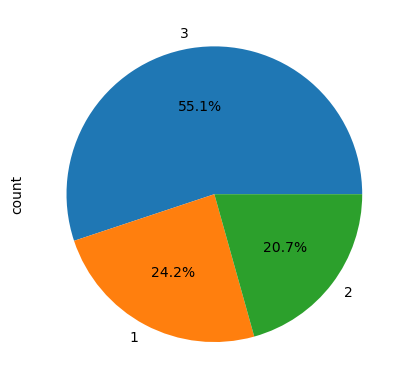

In [93]:
data['Pclass'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Conclusion on Pclass coulumn
- More passengers travel in Class 1, while less passengers travel in Class 2.

----

## sex(Gender) column

In [94]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [95]:
data['Pclass'].isnull().sum()

0

<Axes: xlabel='Sex'>

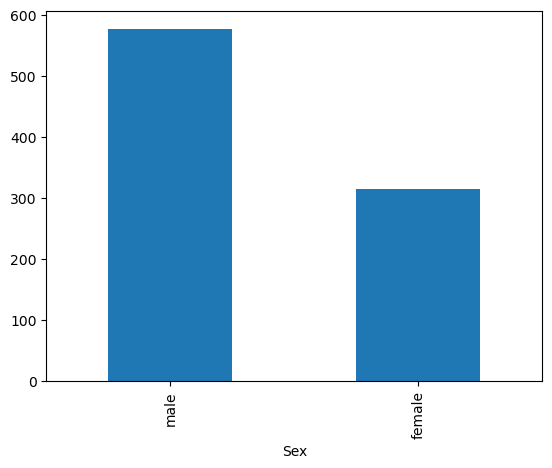

In [96]:
data['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

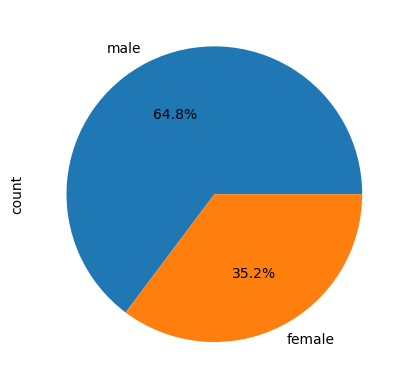

In [97]:
data['Sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Conclusion on Sex(Gender) coulumn
- nothing looks wrong in this column
- More men are traveling than women, which is pretty common.

----

### SibSp & Parch column

In [98]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

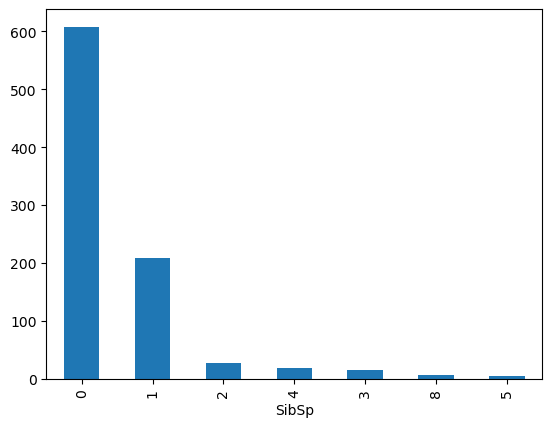

In [99]:
data['SibSp'].value_counts().plot(kind='bar')

In [100]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

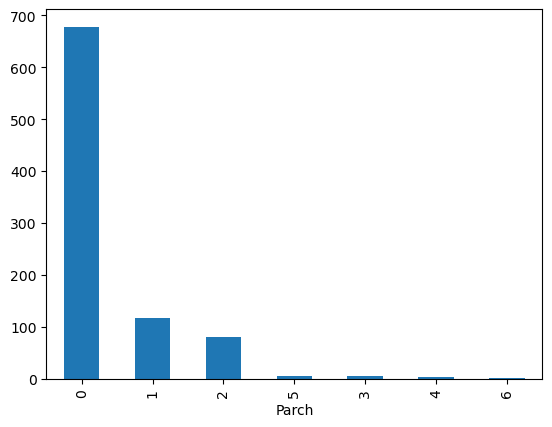

In [101]:
data['Parch'].value_counts().plot(kind='bar')

### Conclusion on SibSp & Parch Columns
- Parch and SibSp columns can be merged to form a new column called family_size
- and 2nd column to be created for alone passengers named as (alone)

----

### Embarked column

In [102]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [103]:
data['Embarked'].value_counts().isnull().sum()

0

<Axes: xlabel='Embarked'>

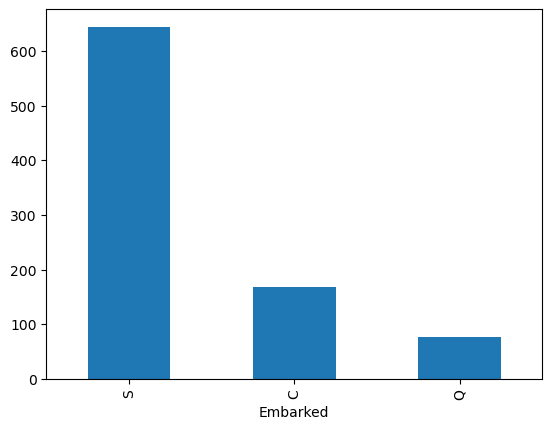

In [104]:
data['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

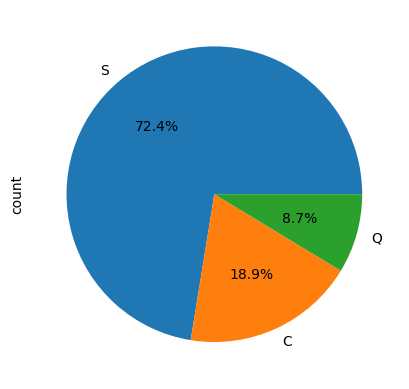

In [105]:
data['Embarked'].value_counts().plot(kind='pie',autopct='%0.1f%%')

### Conclusion on Embarked column
- the majority of passengers boarded from Southampton (S), followed by Cherbourg (C), and finally, Queenstown (Q).

----

----

# ~ *Bivariate analysis*
-starting with survived column because thats the main column of our data

In [106]:
pd.crosstab(data['Survived'],data['Pclass'],normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

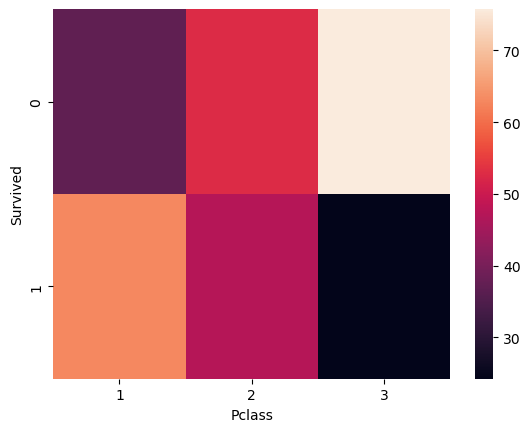

In [107]:
a1 = pd.crosstab(data['Survived'],data['Pclass'],normalize='columns')*100
sns.heatmap(a1)

# conclusion
- Most deaths occurred in Pclass 3.
- The majority of survivors were from Pclass 1.
#### The percentage of people who died in each passenger class is as follows:
- Pclass 1 : 38%
- Pclass 2 : 58%
- Pclass 3 : 76%

----

In [108]:
pd.crosstab(data['Survived'],data['Sex'],normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


# conclusion
- Female passengers: 74.2% survived, 25.7% did not.
- Male passengers: 81.1% died, 18.8% survived.
- Gender played a significant role in survival rates, with females far more likely to survive than males.

----

In [109]:
pd.crosstab(data['Survived'],data['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [110]:
pd.crosstab(data['Pclass'],data['Embarked'],normalize='columns')*100


Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


# conclusion
- Passengers in Pclass 1 had a higher chance of survival compared to those in lower classes.
- Many people traveling in Pclass 1 boarded from Cherbourg (C)
- Rich passengers, especially those in Pclass 1 and from Cherbourg, were more likely to survive on the Titanic.

----

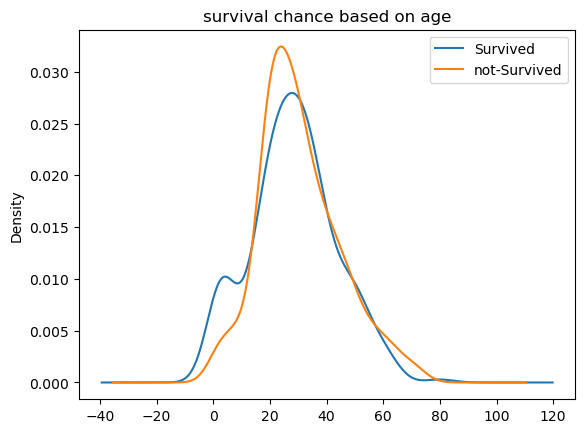

In [111]:
data[data['Survived'] == 1]['Age'].plot(kind='kde',label='Survived')
data[data['Survived'] == 0]['Age'].plot(kind='kde',label='not-Survived')
plt.title('survival chance based on age')
plt.legend()


# conclusion
- Adults experienced lower survival rates as their age increased.
- The data suggests that older individuals had reduced chances of surviving the Titanic disaster.

----

### feature engineering on fare column

In [112]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [113]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [114]:
data2 = pd.read_csv('test.csv')
merged_data = pd.concat([data,data2])

In [115]:
merged_data[merged_data['Ticket']== 'CA 2144']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
139,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S
140,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


In [116]:
merged_data['individual_fare'] = merged_data['Fare']/(merged_data['SibSp'] + merged_data['Parch']+1)

In [117]:
merged_data['family_size'] = merged_data['SibSp'] + merged_data['Parch'] + 1

In [118]:
def tfamily(num):
    if num == 1:
        return 'alone'
    elif num > 1 and num < 5:
        return 'small'
    else:
        return 'large'

In [119]:
merged_data['family_type'] = merged_data['family_size'].apply(tfamily)

----

# bivariate analysis on new columns

In [120]:
pd.crosstab(merged_data['Survived'],merged_data['family_type'],normalize = 'columns')*100

family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


# Conclusion
- Single individuals had a lower chance of survival compared to those who were not single.
- The data indicates that single passengers faced higher risks during the Titanic disaster, resulting in lower survival rates.